In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#### Key Idea
It changes the step size according to some previous updates

Stepsize * 2 when too small, and stepsize/2 when too big

Works only for **constant** stepsize now

In [49]:
# vectorize sgd & frugal
def get_procs(dataset, step_size, tau_lst):
    update_size = 500
    proc = np.zeros((dataset.shape[0], len(tau_lst)))
    q_pre, q_arr = np.zeros(len(tau_lst)), np.zeros(len(tau_lst))
    alpha_adaptation = np.ones(len(tau_lst))

    for k, x in enumerate(dataset):          
        if k % update_size == 0 and k >0:
#             print (k,q_arr-q_pre)
            update_var = update_stepsize(alpha_arr, q_arr-q_pre, step_size, update_size)
            print ('update_var', update_var)
            alpha_adaptation = alpha_adaptation * update_var
#             print ('alpha_adaptation', alpha_adaptation)
            q_pre = [i for i in q_arr]
        if step_size != 'frugal': 
            alpha_arr = set_stepsize(k+1, step_size, len(tau_lst))* alpha_adaptation
#             if k % update_size == 0: print('alpha_arr', alpha_arr)
        for i, q in enumerate(q_arr):
            tau = tau_lst[i]
            alpha = alpha_arr[i]
            if step_size != 'frugal':
                q = sgd(q, x, tau, alpha)
            else: 
                q = frugal(q, x, tau)
            q_arr[i] = q
        proc[k] = q_arr
#     print (alpha_arr)
    return proc.T
   
def set_stepsize(idx, step_size, len_arr):
    return np.ones(len_arr)*10


def update_stepsize(alpha_arr, diff, step_size, update_size):
    update_var = np.ones(len(diff))
    for i, a in enumerate(alpha_arr):
        d = diff[i]
        if a * update_size * 0.25 < abs(d): update_var[i] = 2
        elif a * update_size * 0.02 > abs(d): update_var[i] = 1/2
#     print ('step_size', update_var)
    return update_var
    
def sgd(q, x, tau, alpha):
    if x > q:
        q = q + alpha*tau
    else:
        q = q - alpha*(1-tau)  
    return q
    
def frugal(q, x, tau):
    rdn = np.random.uniform()
    if x > q and rdn > 1-tau:
        q += 1
    elif x < q and rdn > tau:
        q -= 1
    return q



array([-74370.84816627, -44645.79916678,  -9814.85680144,   4895.09414453,
        67351.23647763])

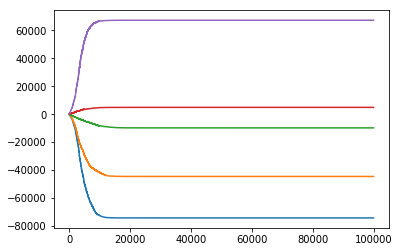

In [28]:
data_size = 100000
dt = np.random.normal(10000, 50000, data_size)
proc = get_procs(dt, 0, [0.01, 0.1, 0.3, 0.5, 0.9]) 
plt.plot(proc.T)
proc[:,-1]

update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 0.5 0.5]
update_var [0.5 0.5 0.5 1.  0.5]
update_var [0.5 0.5 0.5 1.  0.5]
update_var [0.5 0.5 1.  0.5 0.5]
update_var [0.5 0.5 1.  1.  0.5]
update_var [0.5 0.5 0.5 1.  0.5]
update_var

array([1.06743756e-06, 9.79510433e-06, 3.02268582e-05, 4.94519729e-05,
       9.01143680e-05])

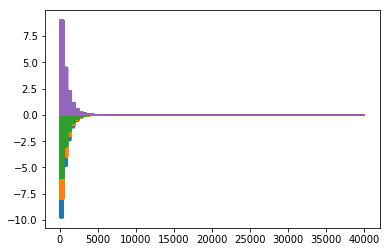

In [50]:
data_size = 40000
dt = np.random.uniform(0, 0.0001, data_size)
proc = get_procs(dt, 0, [0.01, 0.1, 0.3, 0.5, 0.9]) 
plt.plot(proc.T)
proc[2:4,:10]
proc[:, -1]

In [ ]:
def get_procs(dataset, step_size, tau_lst):
    if len(dataset.shape)!= 1: 
        raise Exception('Dataset for get_procs() of wrong shape:' + str(dataset.shape)+ ', should be 1d array')
        
    procs = np.zeros((len(tau_lst), dataset.shape[0]))
    for idx, tau in enumerate(tau_lst):
        q = 0
        q_sgd_proc = procs[idx]
        # change stepsize
        if step_size != 'frugal':
            for k, x in enumerate(dataset):
#                 if idx==1: print (k, ':', q)
                alpha = set_stepsize(k+1, step_size)
                if x > q:
                    q = q + alpha*tau
                else:
                    q = q - alpha*(1-tau)
                q_sgd_proc[k] = q
        
        # frugal
        else:
            rdn_lst = np.random.uniform(0,1, dataset.shape[0])
            for k, x in enumerate(dataset):
                rdn = rdn_lst[k]
                if x > q and rdn > 1-tau:
                    q += 1
                elif x < q and rdn > tau:
                    q -= 1
                q_sgd_proc[k] = q
    return procs